# MILESTONE 1

## Introduction

`Kezia Intan Natalie`

`Batch 003`

Link HuggingFace : `https://huggingface.co/spaces/Keziaa/Milestone1-Phase2`

## Problem Statement

Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

## Import Library

Import all library that we need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow

# Correlation
from phik import resources, report
from phik.report import plot_correlation_matrix

# Split
from sklearn.model_selection import train_test_split

# Outliers Handling
from feature_engine.outliers import Winsorizer

# Scale and Encode
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

# Pipeline sklearn
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb
from sklearn.compose import ColumnTransformer

# Model Tensorflow
import tensorflow as tf
from tensorflow import keras

# Evaluate Model
from sklearn.metrics import classification_report,roc_auc_score

import pickle

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Load our dataset

In [2]:
# Load data
df = pd.read_csv('churn.csv')

In [3]:
# Show all columns
pd.set_option('display.max_columns', None)

In [4]:
# Show first ten rows
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [5]:
# Show last ten rows
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Show shape of our dataset

In [6]:
# Rows, Columns
df.shape

(37010, 22)

There are **337010** entries data in our dataset

See the data type of each columns and overview the missing value

In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

As we can see there are missing value in **gender**, **region_category**, **joined_through_referral**, **preferred_offer_types**, **medium_of_operation** columns

Now check how much missing value of each columns

In [8]:
# Missing value
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

There are **59 missing value in gender**, **5431 missing value in region_category**, **5442 missing value in joined_through_referral**, **288 missing value in preferred_offer_types**, **5395 missing value in medium_of_operation** and we will handle it later

And check the unique value of each columns

In [9]:
# Unique value
df.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

Now see if there is any duplicate row or not

In [10]:
# Duplicate
df.duplicated().sum()

18

There are `18` duplicate rows and we will drop it later

## Data Cleaning

Here we want to drop **user_id**, **joining_date**, and **last_visit_time** columns because it has so many unique value

In [11]:
df.drop(['user_id','joining_date','last_visit_time'], axis=1, inplace=True)

There are anomaly value in **days_since_last_login** then we have to replace to `0`

In [12]:
df['days_since_last_login'].replace(to_replace=-999, value=0, inplace=True)

Now see the duplicated rows and drop it, then reset the index

In [13]:
df.drop(df[df.duplicated()].index, inplace=True)
# Reset index
df.reset_index(drop=True)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,36,M,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
36988,27,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
36989,20,M,NaN,Gold Membership,Yes,Without Offers,NaN,Mobile_Data,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
36990,38,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,0,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


Now check is the duplicate already dropped or not

In [14]:
df.duplicated().sum()

0

There is no more duplicate datas

Now drop the missing value

In [15]:
# Drop missing value
df.dropna(inplace=True)

Check is the missing value already dropped or not

In [16]:
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

There are no more missing value in our dataset

## Exploratory and Analysis

Now see the count, mean, std, min, Q1, Q2(median), Q3, max of numerical columns

In [17]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22853.0,36.988885,15.899740,10.00,23.000000,37.00,51.00,64.000000
days_since_last_login,22853.0,12.093511,6.160307,0.00,8.000000,12.00,16.00,26.000000
avg_time_spent,22853.0,280.290843,334.371139,0.00,59.840000,161.19,355.21,3235.578521
avg_transaction_value,22853.0,29321.835615,19540.703372,800.46,14224.220000,27553.21,40874.04,99914.050000
avg_frequency_login_days,22853.0,14.694795,9.488088,0.00,7.000000,14.00,22.00,73.061995
points_in_wallet,22853.0,623.610681,270.986150,0.00,573.513497,681.49,757.78,2069.069761
churn_risk_score,22853.0,0.535860,0.498723,0.00,0.000000,1.00,1.00,1.000000


Now see the distribution of target if the target is imbalance then balancing with smote

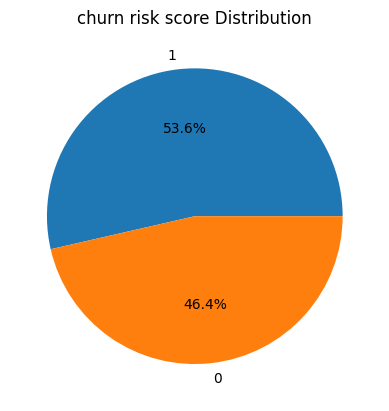

In [18]:
# Target distribution
labels = df['churn_risk_score'].unique()
values = df['churn_risk_score'].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("churn risk score Distribution")
plt.show()

Here the target is quite balance so we don't need to balancing data

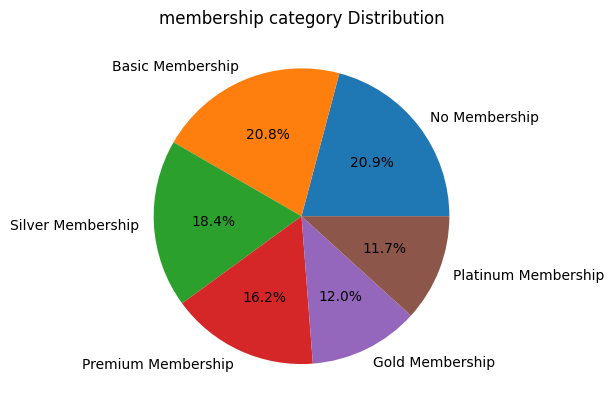

In [4]:
# Target distribution
labels = df['membership_category'].unique()
values = df['membership_category'].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("membership category Distribution")
plt.show()

Plot the count of each category columns

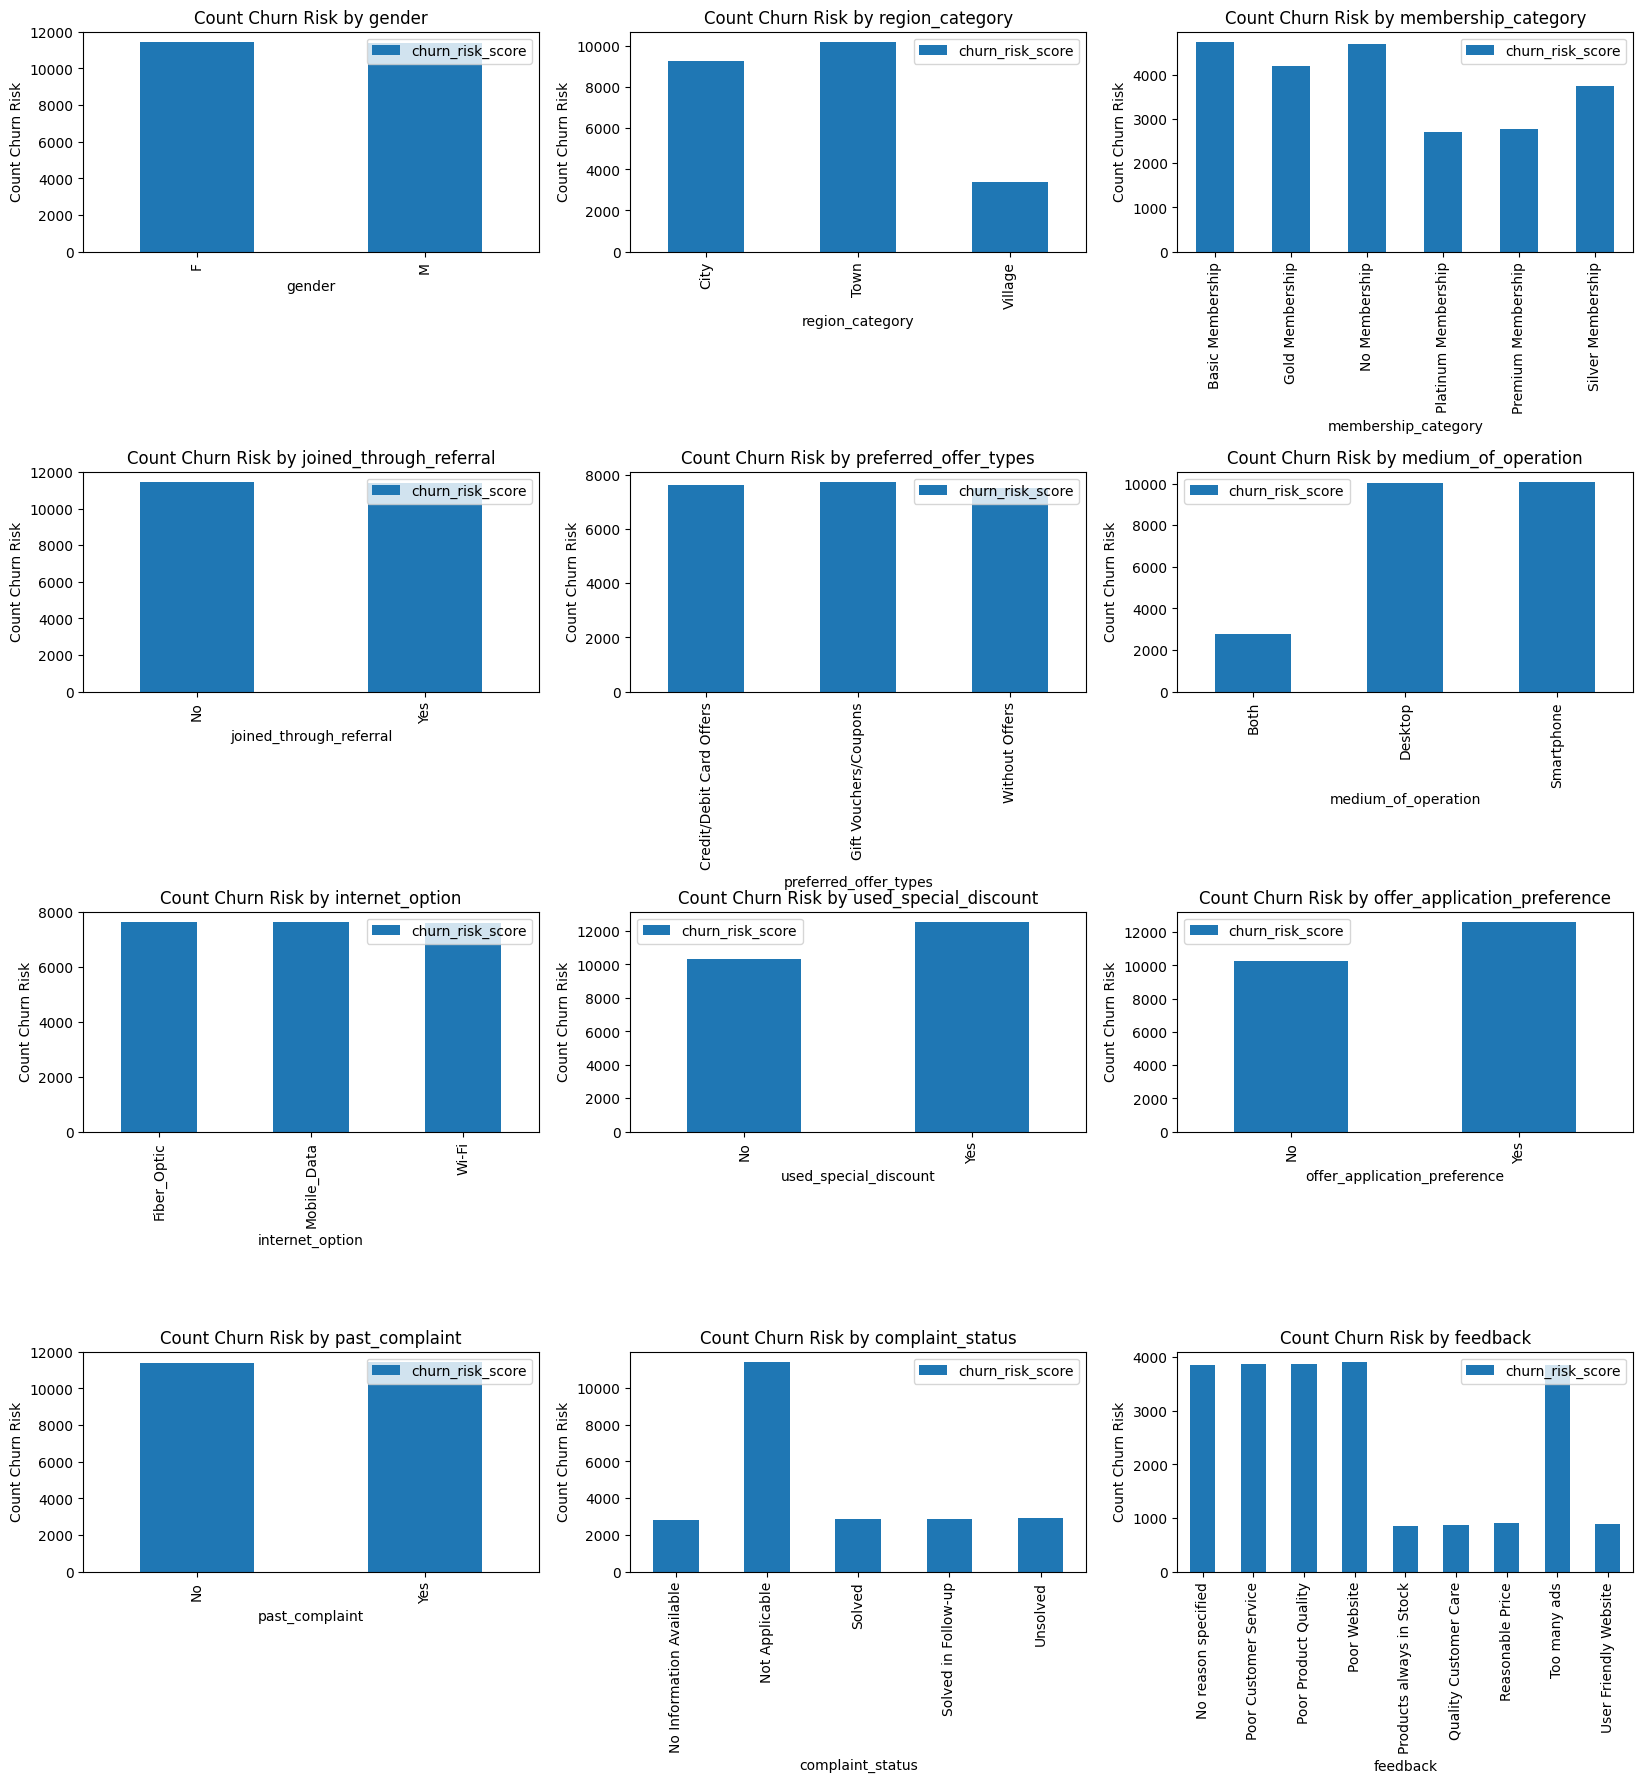

In [19]:
columns = ['gender',
           'region_category',
           'membership_category',
           'joined_through_referral',
           'preferred_offer_types',
           'medium_of_operation',
           'internet_option',
           'used_special_discount',
           'offer_application_preference',
           'past_complaint',
           'complaint_status',
           'feedback']

fig, axs = plt.subplots(4, 3, figsize=(20,20))
axs = axs.ravel()
plt.subplots_adjust(wspace = 0.2, hspace = 1)

# Looping all columns
for i, col in enumerate(columns):
    df.groupby(col)[['churn_risk_score']].count().sort_values(col).plot(kind='bar', ax=axs[i])
    axs[i].set_title(f"Count Churn Risk by {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count Churn Risk")

plt.show()

See the correlation of numerical and categorical columns

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


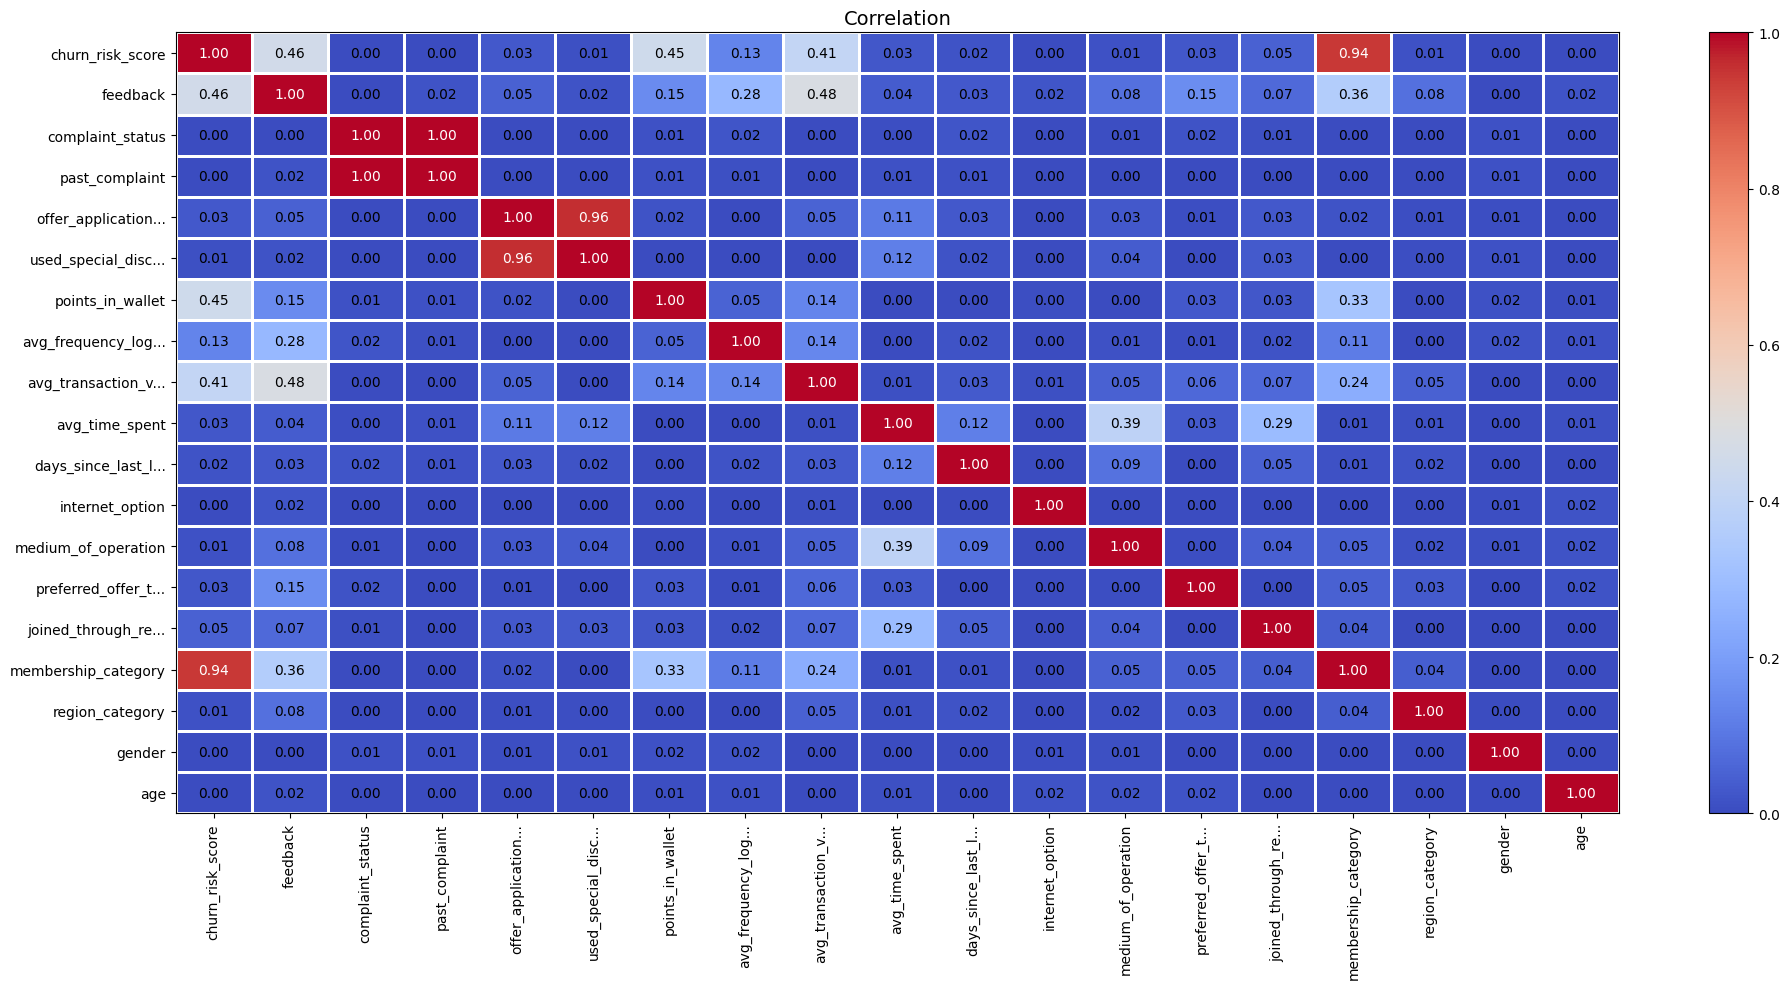

In [20]:
# Visualize the correlation

phik_corr = df.phik_matrix()

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm', 
                        title=r'Correlation', 
                        figsize=(20,10))
plt.show()

Here we use the threshold 0.1 so we have to drop any feature that under 0.1

In [21]:
df.drop(['age','gender','internet_option','complaint_status','past_complaint'], axis=1, inplace=True)

## Split Train Test Validation Data

Now split the train, test, and validation data

In [22]:
# Split train and test
df_train, df_test = train_test_split(df,train_size=0.9, random_state=27, stratify=df['churn_risk_score'])
# Split train and validation
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=27, stratify=df_train['churn_risk_score'])

## Data Prepocessing

Check outliers in numerical columns for checking outliers and skewness

In [23]:
def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()

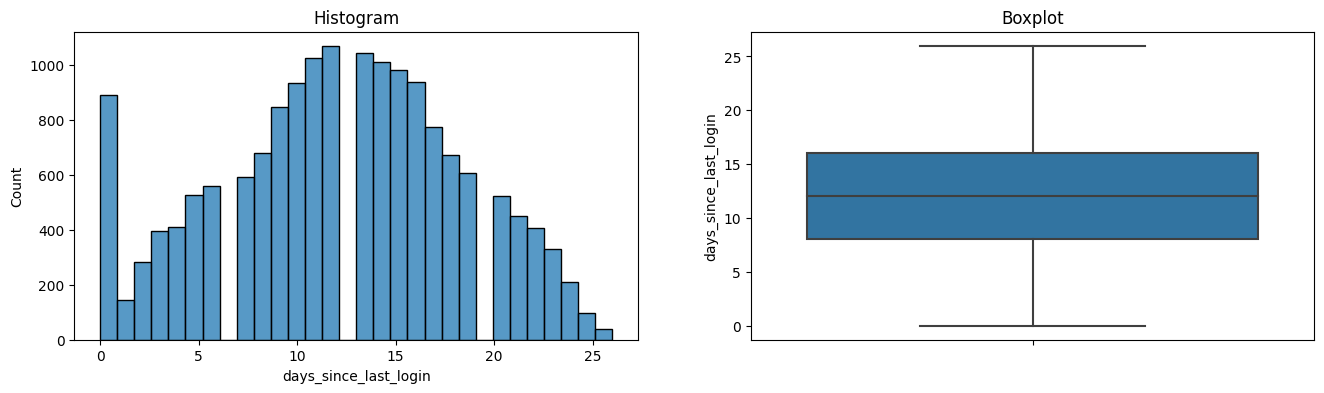

In [24]:
diagnostic_plots(df_train,'days_since_last_login')

In [25]:
# Outlier detection using IQR 
Q3 = df_train['days_since_last_login'].quantile(.75)
Q1 = df_train['days_since_last_login'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['days_since_last_login'] > upper) | (df_train['days_since_last_login'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


There is no outliers in **days_since_last_login** column

In [26]:
df_train['days_since_last_login'].skew()

-0.13796816525293076

The distribution data is not skew

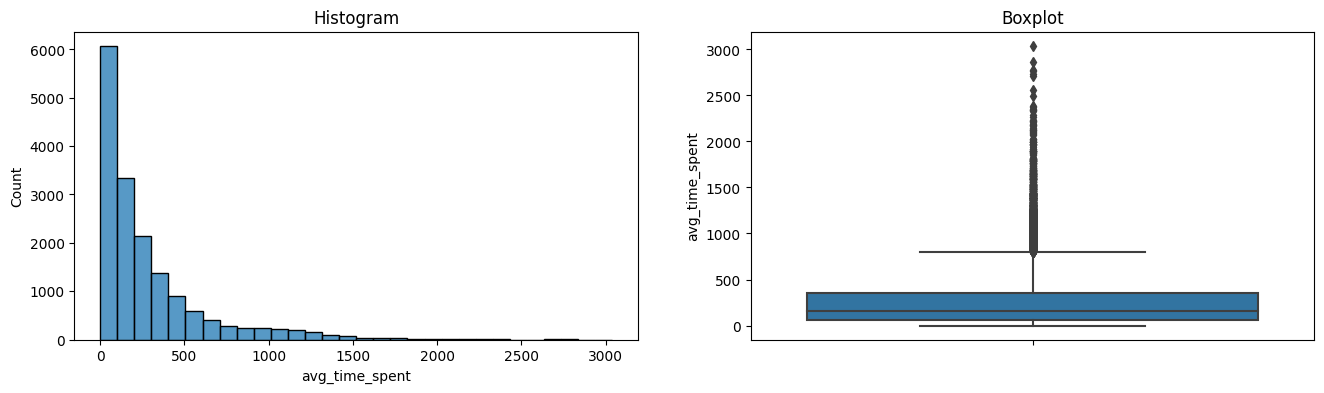

In [27]:
diagnostic_plots(df_train,'avg_time_spent')

In [28]:
# Outlier detection using IQR 
Q3 = df_train['avg_time_spent'].quantile(.75)
Q1 = df_train['avg_time_spent'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['avg_time_spent'] > upper) | (df_train['avg_time_spent'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  1411
percentage of outlier:  6.174244081739815 %


There are 6% outliers in **avg_time_spent** column so we have to capping it

In [29]:
# Cappinng the outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['avg_time_spent'])

df_train = wins.fit_transform(df_train)

In [30]:
outlier = df_train[(df_train['avg_time_spent'] > upper) | (df_train['avg_time_spent'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


There is no more outliers after we capping

In [31]:
df_train['avg_time_spent'].skew()

1.1417358093083603

The distribution data is moderate skew

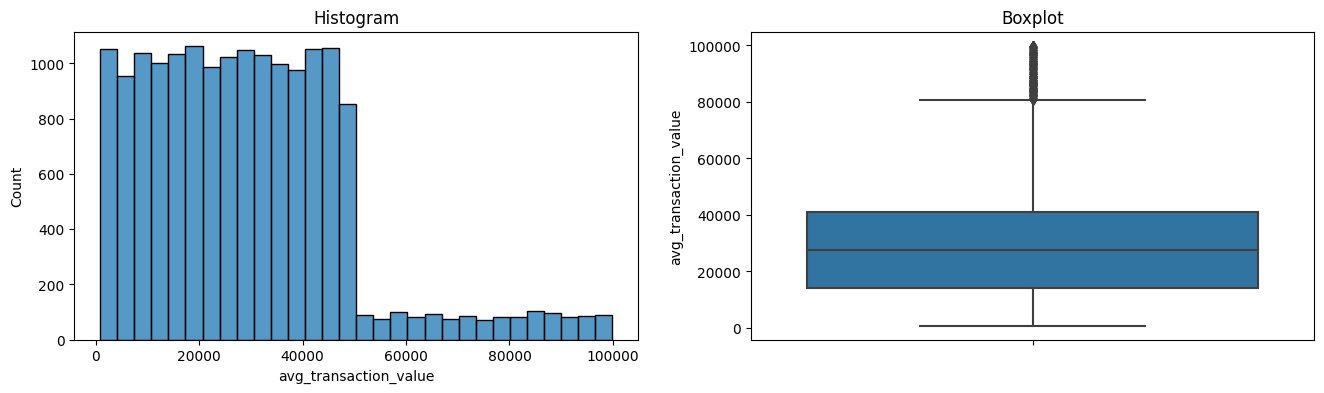

In [32]:
diagnostic_plots(df_train,'avg_transaction_value')

In [33]:
# Outlier detection using IQR 
Q3 = df_train['avg_transaction_value'].quantile(.75)
Q1 = df_train['avg_transaction_value'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['avg_transaction_value'] > upper) | (df_train['avg_transaction_value'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  516
percentage of outlier:  2.2579092460508465 %


There are 2% outliers in **avg_transaction_value** column so just drop it

In [34]:
df_train = df_train[(df_train['avg_transaction_value'] <= upper) & (df_train['avg_transaction_value'] >= lower)]

In [35]:
outlier = df_train[(df_train['avg_transaction_value'] > upper) | (df_train['avg_transaction_value'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


There is no more outliers

In [36]:
df_train['avg_transaction_value'].skew()

0.4447998231291976

The distribution data is not skew

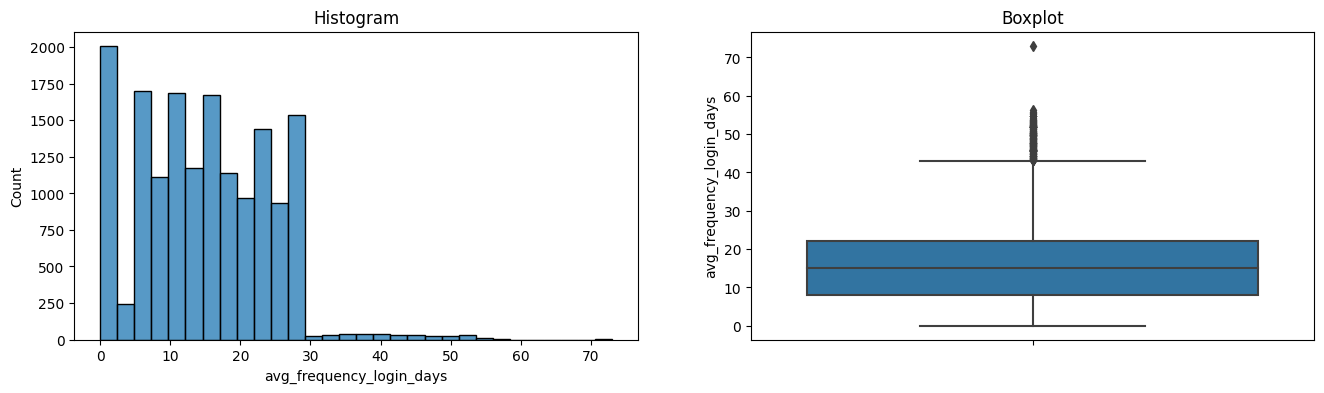

In [37]:
diagnostic_plots(df_train,'avg_frequency_login_days')

In [38]:
# Outlier detection using IQR 
Q3 = df_train['avg_frequency_login_days'].quantile(.75)
Q1 = df_train['avg_frequency_login_days'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['avg_frequency_login_days'] > upper) | (df_train['avg_frequency_login_days'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  137
percentage of outlier:  0.5994836564127248 %


There are under 1% outliers in **avg_frequency_login_days** column so just drop it

In [39]:
df_train = df_train[(df_train['avg_frequency_login_days'] <= upper) & (df_train['avg_frequency_login_days'] >= lower)]

In [40]:
outlier = df_train[(df_train['avg_frequency_login_days'] > upper) | (df_train['avg_frequency_login_days'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


There is no more outliers

In [41]:
df_train['avg_frequency_login_days'].skew()

0.05320850166531198

The distribution data is not skew

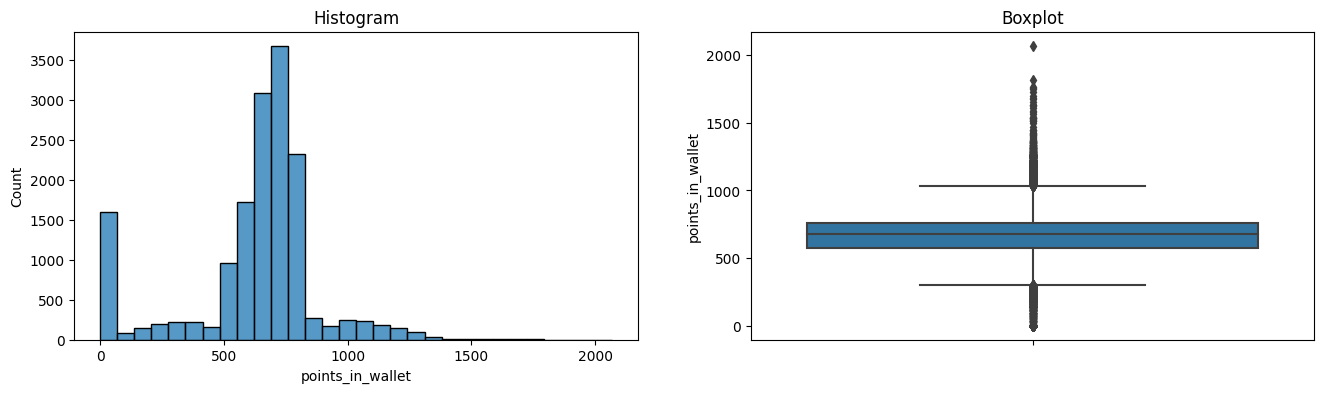

In [42]:
diagnostic_plots(df_train,'points_in_wallet')

In [43]:
# Outlier detection using IQR 
Q3 = df_train['points_in_wallet'].quantile(.75)
Q1 = df_train['points_in_wallet'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['points_in_wallet'] > upper) | (df_train['points_in_wallet'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  2864
percentage of outlier:  12.5322714742047 %


There are 12% outliers in **points_in_wallet** column so we have to capping it

In [44]:
# Cappinng the outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['points_in_wallet'])

df_train = wins.fit_transform(df_train)

In [45]:
outlier = df_train[(df_train['points_in_wallet'] > upper) | (df_train['points_in_wallet'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


There is no more outliers

In [46]:
df_train['points_in_wallet'].skew()

-0.36329347803862205

The distribution data is not skew

## Split Train Test Validation Data

Split the data train, test, validation for modeling

In [47]:
x_train = df_train.drop('churn_risk_score', axis=1)
y_train = df_train['churn_risk_score']
x_test = df_test.drop('churn_risk_score', axis=1)
y_test = df_test['churn_risk_score']
x_val = df_val.drop('churn_risk_score', axis=1)
y_val = df_val['churn_risk_score']

## Feature Engineering

Define the numerical and categorical for scale and encode

In [48]:
num_scale = ['days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
cat_ohe = ['region_category','joined_through_referral','preferred_offer_types','medium_of_operation','used_special_discount','offer_application_preference','feedback']
cat_ord = ['membership_category']

There is **membership_category** that we want to encode using ordinal

Then define the order of the value

In [49]:
membership_category = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership', 'Premium Membership']

## Scale and Encode

Now scale the numerical and encode and the categorical data

In [50]:
scale = MinMaxScaler()
ohe = OneHotEncoder()
ord = OrdinalEncoder(categories=[membership_category])

Make it to pipeline column transformer

In [51]:
preprocessing = ColumnTransformer(transformers=[
                                 ('scale', scale, num_scale),
                                 ('ohe', ohe, cat_ohe),
                                 ('ord', ord, cat_ord)
                                 ])
preprocessing

ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                 ['days_since_last_login', 'avg_time_spent',
                                  'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('ohe', OneHotEncoder(),
                                 ['region_category', 'joined_through_referral',
                                  'preferred_offer_types',
                                  'medium_of_operation',
                                  'used_special_discount',
                                  'offer_application_preference', 'feedback']),
                                ('ord',
                                 OrdinalEncoder(categories=[['No Membership',
                                                             'Basic Membership',
                                                             'Silver '
                                                             'Membership',
                                                             'Gold Membership',
                                                             'Platinum '
                                                             'Membership',
                                                             'Premium '
                                                             'Membership']]),
                                 ['membership_category'])])

Now fit and transform the scaled and encoded of raw data

In [52]:
x_train_final = preprocessing.fit_transform(x_train)
x_test_final = preprocessing.transform(x_test)
x_val_final = preprocessing.transform(x_val)

## Tensorflow Pipeline

Make a pipeline of tensorflow for transform the data

In [53]:
tf.random.set_seed(2712)

train_pipe = tf.data.Dataset.from_tensor_slices((x_train_final,y_train)).shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((x_test_final,y_test)).batch(128)
val_pipe = tf.data.Dataset.from_tensor_slices((x_val_final,y_val)).batch(128)

## Model Definition

### Sequential

Define the sequential model

In [54]:
alp = 7
inp = x_train_final.shape[1]
out = 1
hid = int(len(x_train_final)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

model_seq = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dense(hid/2, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

model_seq.summary()

Jumlah neuron pada hidden layer: 72
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 72)                2232      
                                                                 
 dense_2 (Dense)             (None, 36)                2628      
                                                                 
 dense_3 (Dense)             (None, 1)                 37        
                                                                 
Total params: 5,827
Trainable params: 5,827
Non-trainable params: 0
_________________________________________________________________


Compile the model with optmizer and metrics

In [55]:
model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')

## Model Training

Train the model

In [56]:
history_seq = model_seq.fit(train_pipe, epochs=50, batch_size=32, validation_data=(val_pipe))

Epoch 1/50
124/124 [==============================] - 4s 9ms/step - loss: 0.3193 - accuracy: 0.8397 - val_loss: 0.2760 - val_accuracy: 0.8566
Epoch 2/50
124/124 [==============================] - 1s 7ms/step - loss: 0.2766 - accuracy: 0.8449 - val_loss: 0.2623 - val_accuracy: 0.8503
Epoch 3/50
124/124 [==============================] - 1s 7ms/step - loss: 0.2705 - accuracy: 0.8496 - val_loss: 0.2643 - val_accuracy: 0.8495
Epoch 4/50
124/124 [==============================] - 1s 8ms/step - loss: 0.2662 - accuracy: 0.8527 - val_loss: 0.2578 - val_accuracy: 0.8508
Epoch 5/50
124/124 [==============================] - 1s 9ms/step - loss: 0.2640 - accuracy: 0.8551 - val_loss: 0.2559 - val_accuracy: 0.8483
Epoch 6/50
124/124 [==============================] - 1s 7ms/step - loss: 0.2604 - accuracy: 0.8696 - val_loss: 0.2644 - val_accuracy: 0.8641
Epoch 7/50
124/124 [==============================] - 1s 6ms/step - loss: 0.2536 - accuracy: 0.8838 - val_loss: 0.2493 - val_accuracy: 0.8770
Epoch 

Make a plot so we can easily see the movement

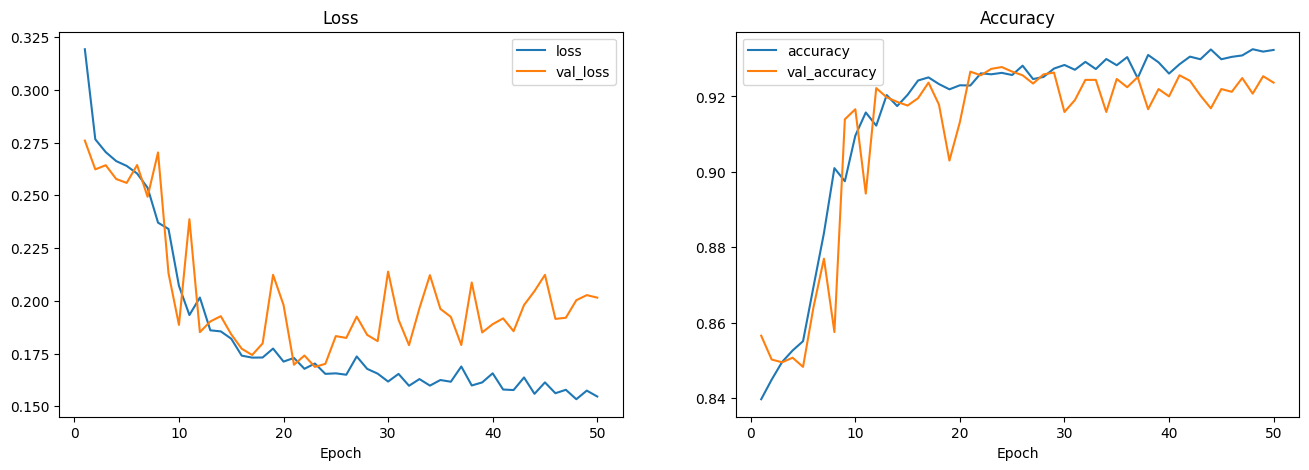

In [57]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## Model Definition

### Functional

Define the model

In [58]:
#Functional
input_lyr = tf.keras.layers.Input(shape=(x_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 72)                2232      
                                                                 
 dense_6 (Dense)             (None, 1)                 73        
                                                                 
Total params: 3,235
Trainable params: 3,235
Non-trainable params: 0
_________________________________________________________________


Compile the model with optmizer and metrics

In [59]:
model_func.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')

## Model Training

Train the model

In [60]:
history_func = model_fun.fit(train_pipe, epochs=50, batch_size=32, validation_data=(val_pipe))

Epoch 1/50
124/124 [==============================] - 1s 10ms/step - loss: 0.1542 - accuracy: 0.9326 - val_loss: 0.2035 - val_accuracy: 0.9237
Epoch 2/50
124/124 [==============================] - 1s 10ms/step - loss: 0.1554 - accuracy: 0.9313 - val_loss: 0.2022 - val_accuracy: 0.9246
Epoch 3/50
124/124 [==============================] - 1s 10ms/step - loss: 0.1559 - accuracy: 0.9317 - val_loss: 0.2031 - val_accuracy: 0.9166
Epoch 4/50
124/124 [==============================] - 1s 6ms/step - loss: 0.1525 - accuracy: 0.9341 - val_loss: 0.2125 - val_accuracy: 0.9176
Epoch 5/50
124/124 [==============================] - 1s 6ms/step - loss: 0.1528 - accuracy: 0.9327 - val_loss: 0.2220 - val_accuracy: 0.9212
Epoch 6/50
124/124 [==============================] - 1s 7ms/step - loss: 0.1539 - accuracy: 0.9331 - val_loss: 0.2190 - val_accuracy: 0.9210
Epoch 7/50
124/124 [==============================] - 1s 7ms/step - loss: 0.1532 - accuracy: 0.9324 - val_loss: 0.2097 - val_accuracy: 0.9268
Epo

Make a plot so we can easily see the movement

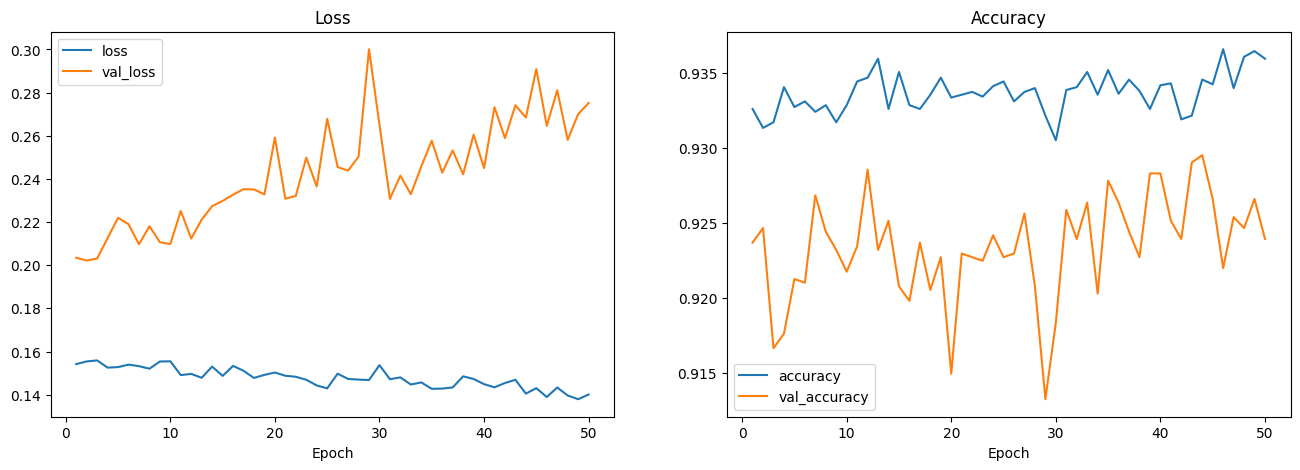

In [61]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## Model Improvement

### Sequential

Improve the model by adding hidden layer, batch normalization, and dropout

In [62]:
# Sequential
seq_improve = tf.keras.models.Sequential()
seq_improve.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(x_train_final.shape[1],))) #input layer
seq_improve.add(tf.keras.layers.BatchNormalization())
seq_improve.add(tf.keras.layers.Dense(hid, activation='relu')) #hidden layer
seq_improve.add(tf.keras.layers.BatchNormalization())
seq_improve.add(tf.keras.layers.Dense(hid/2, activation='relu')) #hidden layer
seq_improve.add(tf.keras.layers.BatchNormalization())
seq_improve.add(tf.keras.layers.Dense(hid/4, activation='relu')) #hidden layer
seq_improve.add(tf.keras.layers.BatchNormalization())
seq_improve.add(tf.keras.layers.Dropout(0.1))
seq_improve.add(tf.keras.layers.Dense(out, activation='sigmoid')) #output layer

seq_improve.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_8 (Dense)             (None, 72)                2232      
                                                                 
 batch_normalization_1 (Batc  (None, 72)               288       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 36)                2628      
                                                                 
 batch_normalization_2 (Batc  (None, 36)              

Compile the model with optmizer and metrics

In [63]:
seq_improve.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')

Train the model

In [64]:
history_seq_improve = seq_improve.fit(train_pipe, epochs=25, batch_size=32, validation_data=(val_pipe))

Epoch 1/25
124/124 [==============================] - 5s 15ms/step - loss: 0.3200 - accuracy: 0.8365 - val_loss: 0.5405 - val_accuracy: 0.8347
Epoch 2/25
124/124 [==============================] - 1s 11ms/step - loss: 0.2848 - accuracy: 0.8425 - val_loss: 0.2853 - val_accuracy: 0.8452
Epoch 3/25
124/124 [==============================] - 1s 11ms/step - loss: 0.2773 - accuracy: 0.8417 - val_loss: 0.3514 - val_accuracy: 0.8469
Epoch 4/25
124/124 [==============================] - 1s 12ms/step - loss: 0.2752 - accuracy: 0.8453 - val_loss: 0.2698 - val_accuracy: 0.8464
Epoch 5/25
124/124 [==============================] - 1s 12ms/step - loss: 0.2703 - accuracy: 0.8454 - val_loss: 0.2582 - val_accuracy: 0.8483
Epoch 6/25
124/124 [==============================] - 1s 12ms/step - loss: 0.2724 - accuracy: 0.8509 - val_loss: 0.2496 - val_accuracy: 0.8770
Epoch 7/25
124/124 [==============================] - 1s 11ms/step - loss: 0.2510 - accuracy: 0.8869 - val_loss: 0.2909 - val_accuracy: 0.8474

Make a plot so we can easily see the movement

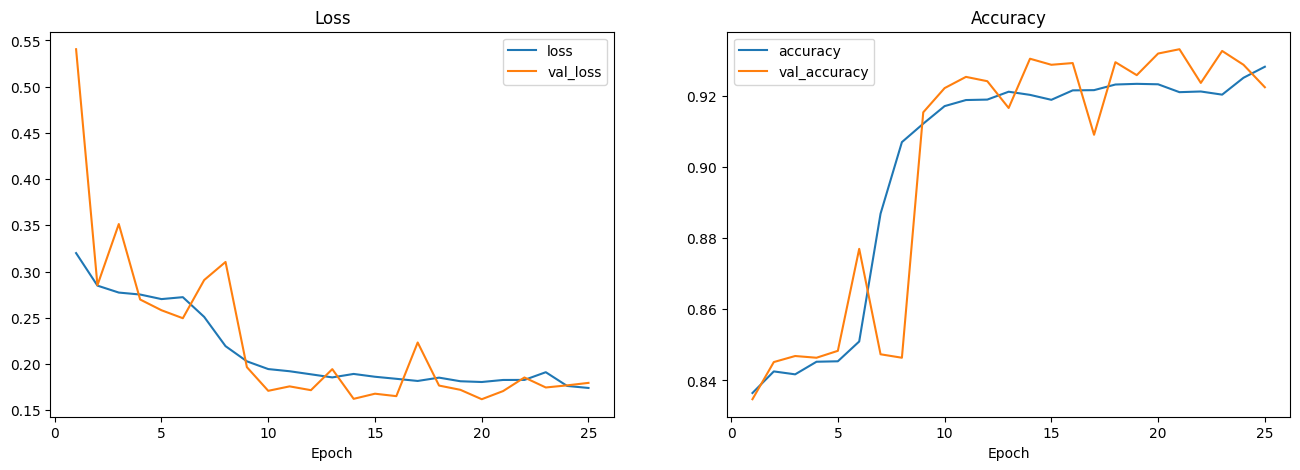

In [65]:
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq_improve.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq_improve.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_seq_improve.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq_improve.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

### Functional

Improve the model by adding hidden layer, batch normalization, and dropout

In [66]:
# Functional
input_lyr = tf.keras.layers.Input(shape=(x_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/2, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/4, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, kernel_initializer='HeNormal',activation='sigmoid')(layers)

func_improve = tf.keras.models.Model(inputs=input_lyr,outputs=output)

func_improve.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_4 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 72)                2232      
                                                                 
 batch_normalization_5 (Batc  (None, 72)               288       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 36)                2628

Compile the model with optmizer and metrics

In [67]:
func_improve.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')

Train the model

In [68]:
history_func_improve = func_improve.fit(train_pipe, epochs=25, batch_size=32, validation_data=(val_pipe))

Epoch 1/25
124/124 [==============================] - 6s 25ms/step - loss: 0.3310 - accuracy: 0.8363 - val_loss: 0.4054 - val_accuracy: 0.8483
Epoch 2/25
124/124 [==============================] - 2s 18ms/step - loss: 0.2847 - accuracy: 0.8468 - val_loss: 0.2965 - val_accuracy: 0.8500
Epoch 3/25
124/124 [==============================] - 2s 13ms/step - loss: 0.2772 - accuracy: 0.8456 - val_loss: 0.2692 - val_accuracy: 0.8522
Epoch 4/25
124/124 [==============================] - 2s 15ms/step - loss: 0.2705 - accuracy: 0.8505 - val_loss: 0.2948 - val_accuracy: 0.8546
Epoch 5/25
124/124 [==============================] - 2s 13ms/step - loss: 0.2649 - accuracy: 0.8618 - val_loss: 0.2631 - val_accuracy: 0.8746
Epoch 6/25
124/124 [==============================] - 3s 22ms/step - loss: 0.2448 - accuracy: 0.8939 - val_loss: 0.5249 - val_accuracy: 0.8646
Epoch 7/25
124/124 [==============================] - 3s 23ms/step - loss: 0.2189 - accuracy: 0.9085 - val_loss: 0.3391 - val_accuracy: 0.8755

Make a plot so we can easily see the movement

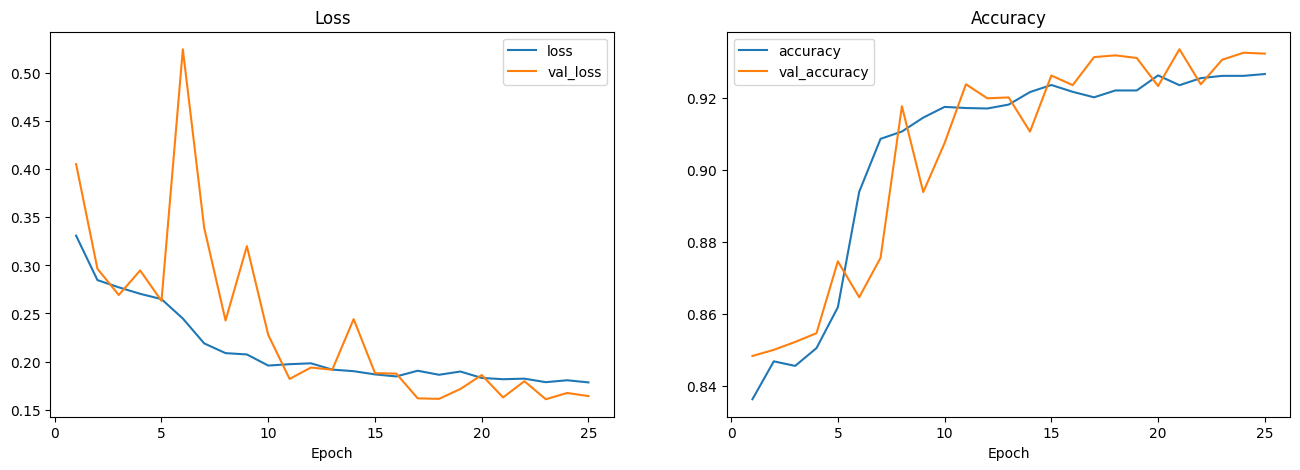

In [69]:
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func_improve.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func_improve.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_func_improve.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func_improve.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## Model Predict

Now predict all the model

In [70]:
y_seq_prob = model_seq.predict(x_test_final)
y_seq_pred = np.round(y_seq_prob)
y_func_prob = model_func.predict(x_test_final)
y_func_pred = np.round(y_func_prob)
y_seq_imp_prob = seq_improve.predict(x_test_final)
y_seq_imp_pred = np.round(y_seq_imp_prob)
y_func_imp_prob = func_improve.predict(x_test_final)
y_func_imp_pred = np.round(y_func_imp_prob)

72/72 [==============================] - 1s 6ms/step


## Model Evaluation

Now evaluate using classification report and auc score

In [71]:
print('Seqeuntial:',classification_report(y_test,y_seq_pred))
print('AUC:',roc_auc_score(y_test,y_seq_prob))
print('Seqeuntial improve:',classification_report(y_test,y_seq_imp_pred))
print('AUC:',roc_auc_score(y_test,y_seq_imp_prob))
print('Functional:',classification_report(y_test,y_func_pred))
print('AUC:',roc_auc_score(y_test,y_func_prob))
print('Functional improve:',classification_report(y_test,y_func_imp_pred))
print('AUC:',roc_auc_score(y_test,y_func_imp_prob))

Seqeuntial:               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1061
           1       0.91      0.96      0.93      1225

    accuracy                           0.92      2286
   macro avg       0.93      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286

AUC: 0.9680274673488622
Seqeuntial improve:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1061
           1       0.97      0.89      0.93      1225

    accuracy                           0.92      2286
   macro avg       0.93      0.93      0.92      2286
weighted avg       0.93      0.92      0.92      2286

AUC: 0.9734859297159014
Functional:               precision    recall  f1-score   support

           0       0.36      0.20      0.25      1061
           1       0.50      0.70      0.58      1225

    accuracy                           0.46      2286
   macro avg       0.43      0.45   

Based on precision recall f1-score accuracy and AUC score we choose **functional** model that improved because it's more stable than others

## Model Analysis

The model is bad it's exploded maybe because we choose to many feature and maybe we can change the batch, hidden layer, and the optimizer to improve the model

## Model Saving

Now save our best model

In [74]:
with open('pipeline.pkl','wb') as file1:
    pickle.dump(preprocessing,file1)

func_improve.save('model functional improve.h5')

## Overall Analysis